In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix,matthews_corrcoef
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance
import pandas as pd
import numpy as np
from collections import defaultdict

In [7]:
credit = pd.read_csv('/Users/azulmakk/Universidad/Analisis Multivariado/Final/credit_risk_dataset.csv', header=0)
print(credit.columns)
selected_columns = ['loan_amnt', 'loan_percent_income', 'person_emp_length', 'loan_int_rate', 'loan_grade']

selected_credit = credit[selected_columns]
print(selected_credit.head())

selected_credit.iloc[:, :4] = selected_credit.iloc[:, :4].apply(pd.to_numeric, errors='coerce')
selected_credit = selected_credit.dropna()
selected_credit['loan_grade'] = selected_credit['loan_grade'].astype('category')

selected_cat = ["A", "B", "C"]
sample = selected_credit[selected_credit['loan_grade'].isin(selected_cat)]
sample_size = 350
loan_grade_counts = sample['loan_grade'].value_counts()

sample = sample.sample(n=sample_size, random_state=42)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
   loan_amnt  loan_percent_income  person_emp_length  loan_int_rate loan_grade
0      35000                 0.59              123.0          16.02          D
1       1000                 0.10                5.0          11.14          B
2       5500                 0.57                1.0          12.87          C
3      35000                 0.53                4.0          15.23          C
4      35000                 0.55                8.0          14.27          C


In [8]:
def calculo_indicadores(predicciones, etiquetas):
    matriz_confusion = confusion_matrix(etiquetas, predicciones, labels=np.unique(etiquetas))
    
    accuracy = accuracy_score(etiquetas, predicciones)
    
    precision = precision_score(etiquetas, predicciones, average='weighted', zero_division=0)
    
    f1 = f1_score(etiquetas, predicciones, average='weighted', zero_division=0)

    indicadores = {"Matriz de confusion": matriz_confusion,"Accuracy": accuracy, "Precision": precision, "F1 Score": f1}
    return indicadores

## _k_ Nearest Neighbour

### Distancias Euclideas

In [9]:
X = sample[['loan_amnt', 'loan_percent_income', 'person_emp_length', 'loan_int_rate']]
y = sample['loan_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
param_grid = {'n_neighbors': list(range(1, 51))}

knnEucli = KNeighborsClassifier()
grid_searchEucli = GridSearchCV(knnEucli, param_grid, cv=5)

In [11]:
grid_searchEucli.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [12]:
best_modelEucli = grid_searchEucli.best_estimator_

predictionsEucli = best_modelEucli.predict(X_test)
indicadoresEucli = calculo_indicadores(predictionsEucli, y_test)
matthews_coefEucli = matthews_corrcoef(predictionsEucli, y_test)

print("Best k:", best_modelEucli.get_params()['n_neighbors'])
print("Matriz de Confusion:\n", indicadoresEucli["Matriz de confusion"])
print("Accuracy:", indicadoresEucli["Accuracy"])
print("Precision:", indicadoresEucli["Precision"])
print("Matthews Correlation Coefficient:", matthews_coefEucli)
print("F1 Score:", indicadoresEucli["F1 Score"])

Best k: 2
Matriz de Confusion:
 [[26  4  0]
 [12 11  1]
 [ 3 12  1]]
Accuracy: 0.5428571428571428
Precision: 0.5257452574525745
Matthews Correlation Coefficient: 0.2672502466998856
F1 Score: 0.48717928485948375


### Distancia de Mahattan

In [13]:
knnCityBlock = KNeighborsClassifier(metric='manhattan')

grid_searchCityBlock = GridSearchCV(knnCityBlock, param_grid, cv=5)

grid_searchCityBlock.fit(X_train, y_train)

best_modelCityBlock = grid_searchCityBlock.best_estimator_

predictionsCityBlock = best_modelCityBlock.predict(X_test)
indicadoresCityBlock = calculo_indicadores(predictionsCityBlock, y_test)
matthews_coefCityBlock = matthews_corrcoef(predictionsCityBlock, y_test)
accuracyCityBlock = accuracy_score(y_test, predictionsCityBlock)
precisionCityBlock = precision_score(y_test, predictionsCityBlock, average='weighted')
f1CityBlock = f1_score(y_test, predictionsCityBlock, average='weighted')

print("Best k:", best_modelCityBlock.get_params()['n_neighbors'])
print("Matriz de Confusion:\n", indicadoresCityBlock["Matriz de confusion"])
print("Accuracy:", accuracyCityBlock)
print("Precision:", precisionCityBlock)
print("Matthews Correlation Coefficient:", matthews_coefCityBlock)
print("F1 Score:", f1CityBlock)

Best k: 2
Matriz de Confusion:
 [[26  4  0]
 [12 11  1]
 [ 4 11  1]]
Accuracy: 0.5428571428571428
Precision: 0.524646781789639
Matthews Correlation Coefficient: 0.2667265010357103
F1 Score: 0.4857777777777778


### Distancia de Chebychev

In [14]:
knn_chebyshev = KNeighborsClassifier(metric='chebyshev')

grid_search_chebyshev = GridSearchCV(knn_chebyshev, param_grid, cv=5)

grid_search_chebyshev.fit(X_train, y_train)

best_model_chebyshev = grid_search_chebyshev.best_estimator_

predictions_chebyshev = best_model_chebyshev.predict(X_test)
indicadores_chebyshev = calculo_indicadores(predictions_chebyshev, y_test)

accuracy_chebyshev = accuracy_score(y_test, predictions_chebyshev)
precision_chebyshev = precision_score(y_test, predictions_chebyshev, average='weighted')
matthews_coefChebychev = matthews_corrcoef(predictions_chebyshev, y_test)
f1_chebyshev = f1_score(y_test, predictions_chebyshev, average='weighted')

print("Best k:", best_model_chebyshev.get_params()['n_neighbors'])
print("Matriz de Confusion:\n", indicadores_chebyshev["Matriz de confusion"])
print("Accuracy:", accuracy_chebyshev)
print("Precision:", precision_chebyshev)
print("Matthews Correlation Coefficient:", matthews_coefChebychev)
print("F1 Score:", f1_chebyshev)

Best k: 1
Matriz de Confusion:
 [[20  8  2]
 [ 4 17  3]
 [ 2  8  6]]
Accuracy: 0.6142857142857143
Precision: 0.6309690309690309
Matthews Correlation Coefficient: 0.40840885001460314
F1 Score: 0.6122210287623822


### Distancias de Canberra

In [15]:
canberra_distance = pairwise_distances(X_train, X_train, metric='canberra')

knn_canberra = KNeighborsClassifier(metric='precomputed')

grid_search_canberra = GridSearchCV(knn_canberra, param_grid, cv=5)

grid_search_canberra.fit(canberra_distance, y_train)

best_model_canberra = grid_search_canberra.best_estimator_

canberra_distance_test = pairwise_distances(X_test, X_train, metric='canberra')

predictions_canberra = best_model_canberra.predict(canberra_distance_test)
indicadores_canberra = calculo_indicadores(predictions_chebyshev, y_test)
matthews_coefCanberra = matthews_corrcoef(predictions_canberra, y_test)
accuracy_canberra = accuracy_score(y_test, predictions_canberra)
precision_canberra = precision_score(y_test, predictions_canberra, average='weighted')

f1_canberra = f1_score(y_test, predictions_canberra, average='weighted')

print("Best k:", best_model_canberra.get_params()['n_neighbors'])
print("Matriz de Confusion:\n", indicadores_canberra["Matriz de confusion"])
print("Accuracy:", accuracy_canberra)
print("Precision:", precision_canberra)
print("Matthews Correlation Coefficient:", matthews_coefCanberra)
print("F1 Score:", f1_canberra)

Best k: 10
Matriz de Confusion:
 [[20  8  2]
 [ 4 17  3]
 [ 2  8  6]]
Accuracy: 0.7142857142857143
Precision: 0.8006981740064447
Matthews Correlation Coefficient: 0.5805444336819781
F1 Score: 0.6931447640235181


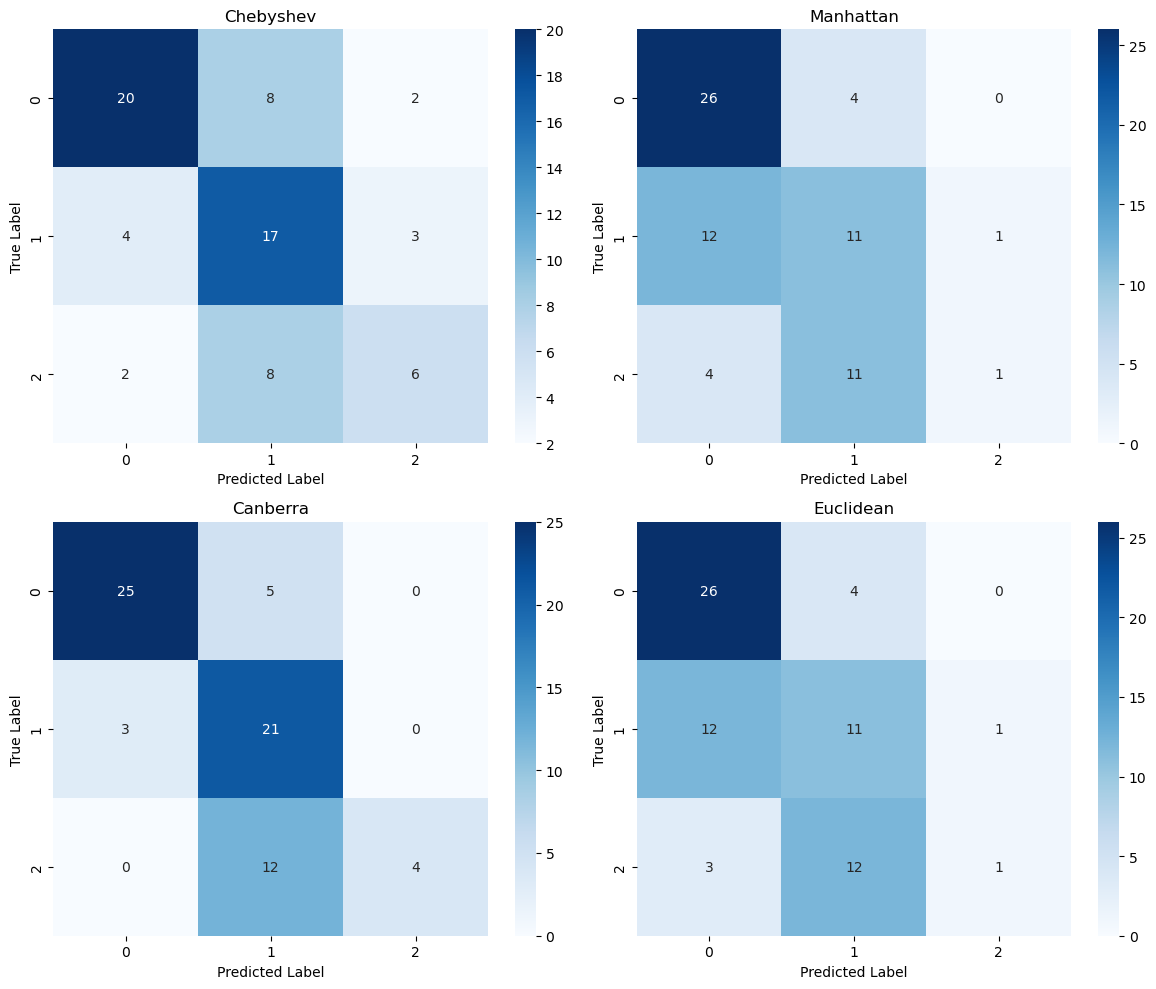

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_heatmap(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cm_chebyshev = confusion_matrix(y_test, predictions_chebyshev)
plot_confusion_matrix_heatmap(axes[0, 0], cm_chebyshev, 'Chebyshev')

cm_manhattan = confusion_matrix(y_test, predictionsCityBlock)
plot_confusion_matrix_heatmap(axes[0, 1], cm_manhattan, 'Manhattan')

cm_canberra = confusion_matrix(y_test, predictions_canberra)
plot_confusion_matrix_heatmap(axes[1, 0], cm_canberra, 'Canberra')

cm_euclidean = confusion_matrix(y_test, predictionsEucli)
plot_confusion_matrix_heatmap(axes[1, 1], cm_euclidean, 'Euclidean')

plt.tight_layout()
plt.show()

# Algoritmo de elaboración propia

###  Distancias Euclideas

In [17]:
knnEucliNuestro = KNeighborsClassifier(metric='euclidean', weights=lambda x: 1/(x**2 + 1e-6))

grid_searchEucliNuestro = GridSearchCV(knnEucliNuestro, param_grid, cv=5, scoring='accuracy')
grid_searchEucliNuestro.fit(X_train, y_train)
best_k = grid_searchEucliNuestro.best_params_['n_neighbors']

def calculate_group_probabilitiesEucli(X_train, y_train, X_test, k_neighbors):
    probabilities = []

    for i in range(len(X_test)):
        distances = [(j, distance.euclidean(X_test.iloc[i], X_train.iloc[j])) for j in range(len(X_train))]
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k_neighbors]

        group_probabilities = defaultdict(float)
        total_distance = 0

        for idx, dist in neighbors:
            group = y_train.iloc[idx]
            weight = 1 / (dist**2 + 1e-6)  # Modificación en la ponderación
            group_probabilities[group] += weight
            total_distance += weight

        normalized_probabilities = {group: prob / total_distance for group, prob in group_probabilities.items()}
        probabilities.append(normalized_probabilities)

    return probabilities

probabilitiesEucli = calculate_group_probabilitiesEucli(X_train, y_train, X_test, best_k)

threshold = 0.8
predictions_binaryEucli = [max(prob_dict.items(), key=lambda x: x[1])[0] for prob_dict in probabilitiesEucli]

y_true = y_test.astype(str)
confusion_matrix_binaryEucli = confusion_matrix(y_true, predictions_binaryEucli)
accuracy_binaryEucli = accuracy_score(y_true, predictions_binaryEucli)
precision_binaryEucli = precision_score(y_true, predictions_binaryEucli, average='weighted')
matthews_binaryCoefEucli = matthews_corrcoef(predictions_binaryEucli, y_test)
f1_binaryEucli = f1_score(y_true, predictions_binaryEucli, average='weighted')

print("Mejor valor de k (obtenido por GridSearchCV):", best_k)
print("Matriz de Confusión:\n", confusion_matrix_binaryEucli)
print("Accuracy:", accuracy_binaryEucli)
print("Precision:", precision_binaryEucli)
print("Matthews Correlation Coefficient:", matthews_binaryCoefEucli)
print("F1 Score:", f1_binaryEucli)

Mejor valor de k (obtenido por GridSearchCV): 1
Matriz de Confusión:
 [[21  7  2]
 [ 5 16  3]
 [ 2  8  6]]
Accuracy: 0.6142857142857143
Precision: 0.6230624214495183
Matthews Correlation Coefficient: 0.4031898943621348
F1 Score: 0.611412648654028


### Distancias de Manhattan

In [18]:
knnManhattanNuestro = KNeighborsClassifier(metric='cityblock', weights=lambda x: 1/(x**2 + 1e-6))

grid_searchManhattanNuestro = GridSearchCV(knnManhattanNuestro, param_grid, cv=5, scoring='accuracy')
grid_searchManhattanNuestro.fit(X_train, y_train)
best_k_manhattan = grid_searchManhattanNuestro.best_params_['n_neighbors']

def calculate_group_probabilitiesManhattan(X_train, y_train, X_test, k_neighbors):
    probabilities = []

    for i in range(len(X_test)):
        manhattan_distances = [(j, distance.cityblock(X_test.iloc[i], X_train.iloc[j])) for j in range(len(X_train))]
        manhattan_distances.sort(key=lambda x: x[1])
        neighbors = manhattan_distances[:k_neighbors]

        group_probabilities = defaultdict(float)
        total_distance = 0

        for idx, dist in neighbors:
            group = y_train.iloc[idx]
            weight = 1 / (dist**2 + 1e-6)  # Modificación en la ponderación
            group_probabilities[group] += weight
            total_distance += weight

        normalized_probabilities = {group: prob / total_distance for group, prob in group_probabilities.items()}
        probabilities.append(normalized_probabilities)

    return probabilities

probabilitiesManhattan = calculate_group_probabilitiesManhattan(X_train, y_train, X_test, best_k_manhattan)

threshold = 0.8
predictions_binaryManhattan = [max(prob_dict.items(), key=lambda x: x[1])[0] for prob_dict in probabilitiesManhattan]

y_true_manhattan = y_test.astype(str)
confusion_matrix_binaryManhattan = confusion_matrix(y_true_manhattan, predictions_binaryManhattan)
accuracy_binaryManhattan = accuracy_score(y_true_manhattan, predictions_binaryManhattan)
precision_binaryManhattan = precision_score(y_true_manhattan, predictions_binaryManhattan, average='weighted')
matthews_binaryCoefManhattan = matthews_corrcoef(predictions_binaryManhattan, y_test)
f1_binaryManhattan = f1_score(y_true_manhattan, predictions_binaryManhattan, average='weighted')

print("Mejor valor de k (obtenido por GridSearchCV):", best_k_manhattan)
print("Matriz de Confusión:\n", confusion_matrix_binaryManhattan)
print("Accuracy:", accuracy_binaryManhattan)
print("Precision:", precision_binaryManhattan)
print("Matthews Correlation Coefficient:", matthews_binaryCoefManhattan)
print("F1 Score:", f1_binaryManhattan)

Mejor valor de k (obtenido por GridSearchCV): 3
Matriz de Confusión:
 [[20  8  2]
 [ 6 16  2]
 [ 2  8  6]]
Accuracy: 0.6
Precision: 0.6146938775510205
Matthews Correlation Coefficient: 0.3806748897481446
F1 Score: 0.5969793753044984


### Distancias de Chevychev

In [19]:
param_grid = {'n_neighbors': range(1, 51)}

knnChebyshevNuestro = KNeighborsClassifier(metric='chebyshev', weights=lambda x: 1/(x**2 + 1e-6))

grid_searchChebyshevNuestro = GridSearchCV(knnChebyshevNuestro, param_grid, cv=5, scoring='accuracy')
grid_searchChebyshevNuestro.fit(X_train, y_train)
best_k_chebyshev = grid_searchChebyshevNuestro.best_params_['n_neighbors']

def calculate_group_probabilitiesChebyshev(X_train, y_train, X_test, k_neighbors):
    probabilities = []

    for i in range(len(X_test)):
        chebyshev_distances = [(j, distance.chebyshev(X_test.iloc[i], X_train.iloc[j])) for j in range(len(X_train))]
        chebyshev_distances.sort(key=lambda x: x[1])
        neighbors = chebyshev_distances[:k_neighbors]

        group_probabilities = defaultdict(float)
        total_distance = 0

        for idx, dist in neighbors:
            group = y_train.iloc[idx]
            weight = 1 / (dist**2 + 1e-6)  # Modificación en la ponderación
            group_probabilities[group] += weight
            total_distance += weight

        normalized_probabilities = {group: prob / total_distance for group, prob in group_probabilities.items()}
        probabilities.append(normalized_probabilities)

    return probabilities

probabilitiesChebyshev = calculate_group_probabilitiesChebyshev(X_train, y_train, X_test, best_k_chebyshev)

threshold = 0.8
predictions_binaryChebyshev = [max(prob_dict.items(), key=lambda x: x[1])[0] for prob_dict in probabilitiesChebyshev]

y_true_chebyshev = y_test.astype(str)
confusion_matrix_binaryChebyshev = confusion_matrix(y_true_chebyshev, predictions_binaryChebyshev)
accuracy_binaryChebyshev = accuracy_score(y_true_chebyshev, predictions_binaryChebyshev)
precision_binaryChebyshev = precision_score(y_true_chebyshev, predictions_binaryChebyshev, average='weighted')
matthews_binaryCoefChebyshev = matthews_corrcoef(predictions_binaryChebyshev, y_test)
f1_binaryChebyshev = f1_score(y_true_chebyshev, predictions_binaryChebyshev, average='weighted')

print("Mejor valor de k (obtenido por GridSearchCV):", best_k_chebyshev)
print("Matriz de Confusión:\n", confusion_matrix_binaryChebyshev)
print("Accuracy:", accuracy_binaryChebyshev)
print("Precision:", precision_binaryChebyshev)
print("Matthews Correlation Coefficient:", matthews_binaryCoefChebyshev)
print("F1 Score:", f1_binaryChebyshev)

Mejor valor de k (obtenido por GridSearchCV): 2
Matriz de Confusión:
 [[19  8  3]
 [ 5 16  3]
 [ 3  7  6]]
Accuracy: 0.5857142857142857
Precision: 0.592831541218638
Matthews Correlation Coefficient: 0.3606514225157018
F1 Score: 0.5831539888682746


### Distancia de Canberra

In [37]:
knnCanberraNuestro = KNeighborsClassifier(metric='canberra', weights=lambda x: 1/(x**2 + 1e-6))

grid_searchCanberraNuestro = GridSearchCV(knnCanberraNuestro, param_grid, cv=5, scoring='accuracy')
grid_searchCanberraNuestro.fit(X_train, y_train)
best_k_canberra = grid_searchCanberraNuestro.best_params_['n_neighbors']

def calculate_group_probabilitiesCanberra(X_train, y_train, X_test, k_neighbors):
    probabilities = []

    for i in range(len(X_test)):
        canberra_distances = [(j, distance.canberra(X_test.iloc[i], X_train.iloc[j])) for j in range(len(X_train))]
        canberra_distances.sort(key=lambda x: x[1])
        neighbors = canberra_distances[:k_neighbors]

        group_probabilities = defaultdict(float)
        total_distance = 0

        for idx, dist in neighbors:
            group = y_train.iloc[idx]
            weight = 1 / (dist**2 + 1e-6)  # Modificación en la ponderación
            group_probabilities[group] += weight
            total_distance += weight

        normalized_probabilities = {group: prob / total_distance for group, prob in group_probabilities.items()}
        probabilities.append(normalized_probabilities)

    return probabilities

probabilitiesCanberra = calculate_group_probabilitiesCanberra(X_train, y_train, X_test, best_k_canberra)

threshold = 0.8
predictions_binaryCanberra = [max(prob_dict.items(), key=lambda x: x[1])[0] for prob_dict in probabilitiesCanberra]

y_true_canberra = y_test.astype(str)
confusion_matrix_binaryCanberra = confusion_matrix(y_true_canberra, predictions_binaryCanberra)
accuracy_binaryCanberra = accuracy_score(y_true_canberra, predictions_binaryCanberra)
precision_binaryCanberra = precision_score(y_true_canberra, predictions_binaryCanberra, average='weighted')
matthews_binaryCoefCanberra = matthews_corrcoef(predictions_binaryCanberra, y_test)
f1_binaryCanberra = f1_score(y_true_canberra, predictions_binaryCanberra, average='weighted')

print("Mejor valor de k (obtenido por GridSearchCV):", best_k_canberra)
print("Matriz de Confusión:\n", confusion_matrix_binaryCanberra)
print("Accuracy:", accuracy_binaryCanberra)
print("Precision:", precision_binaryCanberra)
print("Matthews Correlation Coefficient:", matthews_binaryCoefCanberra)
print("F1 Score:", f1_binaryCanberra)

Mejor valor de k (obtenido por GridSearchCV): 48
Matriz de Confusión:
 [[25  5  0]
 [ 1 23  0]
 [ 0 14  2]]
Accuracy: 0.7142857142857143
Precision: 0.8284144427001571
Matthews Correlation Coefficient: 0.6022856474999909
F1 Score: 0.6724077509791796


In [21]:
misclassified_indices = np.where(y_true != predictions_binaryChebyshev)[0]

num_samples_to_visualize = min(5, len(misclassified_indices))
selected_samples = np.random.choice(misclassified_indices, num_samples_to_visualize, replace=False)

for i, sample_idx in enumerate(selected_samples, 1):
    print(f'Instance: {sample_idx}')
    print(f'True Label: {y_true.iloc[sample_idx]}')
    print(f'Predicted Label (Chebyshev): {predictions_binaryChebyshev[sample_idx]}')
    print(f'Predicted Label (Manhattan): {predictions_binaryManhattan[sample_idx]}')
    print(f'Predicted Label (Canberra): {predictions_binaryCanberra[sample_idx]}')
    print(f'Predicted Label (Euclidean): {predictions_binaryEucli[sample_idx]}')
    print('\n' + '-'*30 + '\n')


Instance: 45
True Label: B
Predicted Label (Chebyshev): A
Predicted Label (Manhattan): A
Predicted Label (Canberra): B
Predicted Label (Euclidean): A

------------------------------

Instance: 64
True Label: A
Predicted Label (Chebyshev): B
Predicted Label (Manhattan): B
Predicted Label (Canberra): A
Predicted Label (Euclidean): B

------------------------------

Instance: 66
True Label: C
Predicted Label (Chebyshev): A
Predicted Label (Manhattan): C
Predicted Label (Canberra): B
Predicted Label (Euclidean): C

------------------------------

Instance: 30
True Label: B
Predicted Label (Chebyshev): C
Predicted Label (Manhattan): C
Predicted Label (Canberra): B
Predicted Label (Euclidean): C

------------------------------

Instance: 61
True Label: A
Predicted Label (Chebyshev): C
Predicted Label (Manhattan): A
Predicted Label (Canberra): A
Predicted Label (Euclidean): A

------------------------------



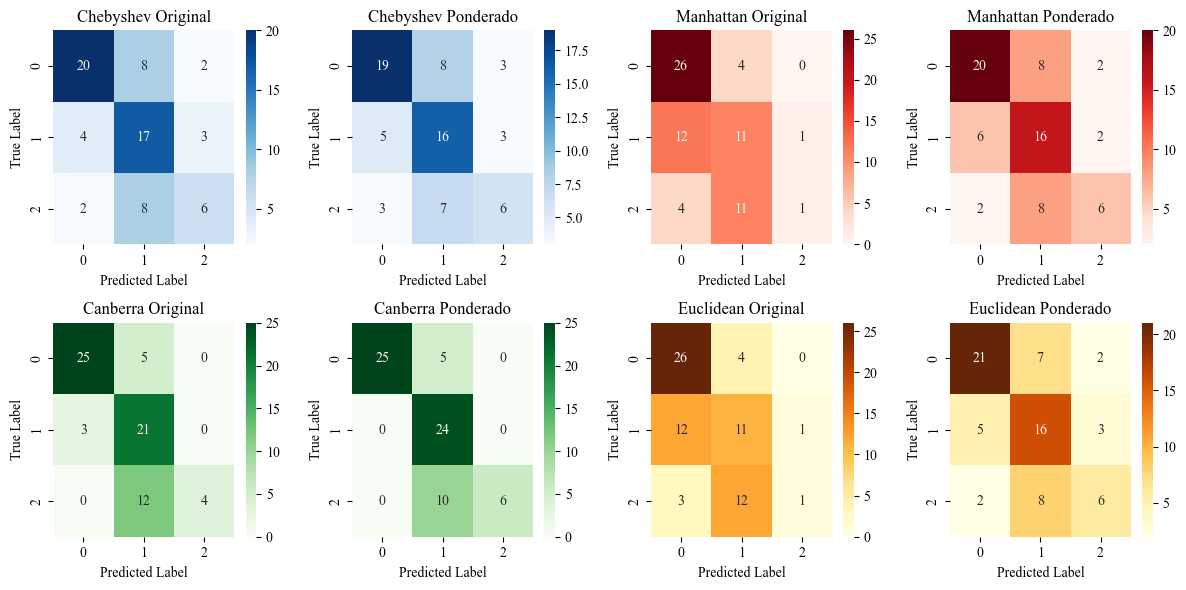

In [35]:
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']

def plot_confusion_matrix_heatmapBlues(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

def plot_confusion_matrix_heatmapReds(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

def plot_confusion_matrix_heatmapYellows(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

def plot_confusion_matrix_heatmapGreens(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

cm_chebyshev = confusion_matrix(y_true, predictions_binaryChebyshev)
plot_confusion_matrix_heatmapBlues(axes[0, 1], cm_chebyshev, 'Chebyshev Ponderado')

cm_chebyshevNorm = confusion_matrix(y_true, predictions_chebyshev)
plot_confusion_matrix_heatmapBlues(axes[0, 0], cm_chebyshevNorm, 'Chebyshev Original')

cm_manhattan = confusion_matrix(y_true, predictions_binaryManhattan)
plot_confusion_matrix_heatmapReds(axes[0, 3], cm_manhattan, 'Manhattan Ponderado')

cm_manhattanNorm = confusion_matrix(y_true, predictionsCityBlock)
plot_confusion_matrix_heatmapReds(axes[0, 2], cm_manhattanNorm, 'Manhattan Original')

cm_canberra = confusion_matrix(y_true, predictions_binaryCanberra)
plot_confusion_matrix_heatmapGreens(axes[1, 1], cm_canberra, 'Canberra Ponderado')

cm_canberraNorm = confusion_matrix(y_true, predictions_canberra)
plot_confusion_matrix_heatmapGreens(axes[1, 0], cm_canberraNorm, 'Canberra Original')

cm_euclideanNorm = confusion_matrix(y_true, predictionsEucli)
plot_confusion_matrix_heatmapYellows(axes[1, 2], cm_euclideanNorm, 'Euclidean Original')

cm_euclidean = confusion_matrix(y_true, predictions_binaryEucli)
plot_confusion_matrix_heatmapYellows(axes[1, 3], cm_euclidean, 'Euclidean Ponderado')

plt.tight_layout()
plt.show()